In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter 

In [321]:
target_column = ['Survived']
# load in the csv files
test = pd.read_csv('data_files/test.csv')
train = pd.read_csv('data_files/train.csv')
# determine the nans in each column
print(train.isna().sum())
# describe data
print(train.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


In [322]:
#check if any of the columns have out of bounds values
valid_survived = [0, 1]
print((~train['Survived'].isin(valid_survived)).sum())
valid_pclass = [1, 2, 3]
print((~train['Pclass'].isin(valid_pclass)).sum())
valid_sex = ['male', 'female']
print((~train['Sex'].isin(valid_gender)).sum())
valid_embarked = ['C', 'Q', 'S']
print((~train['Embarked'].isin(valid_embarked)).sum())
print(train[~train['Embarked'].isin(valid_embarked)])

0
0
0
2
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [323]:
# split the features from the target
train_target = train[target_column]
train_features = train.drop(target_column, axis=1)
# print the columns in the dataframe
print(train_target.columns)
print(train_features.columns)

Index(['Survived'], dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [324]:
print(train_features.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [325]:
#encode gender
train['Male'] = (train['Sex'].str.lower() == 'male').astype(int)
print(train.head())
train.drop('Sex', axis=1, inplace=True)
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Male  
0      0         A/5 21171   7.2500   NaN        S     1  
1      0          PC 17599  71.2833   C85        C     0  
2      0  STON/O2. 3101282   7.9250   NaN        S     0  
3      0            113803  53.1000  C123        S     0  
4      0            37345

In [326]:
# extract last name
train['LastName'] = train['Name'].str.split(',', n=1, expand=True).get(0).str.lower()
print(train.head())
train.drop('Name', axis=1, inplace=True)
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Male   LastName  
0         A/5 21171   7.2500   NaN        S     1     braund  
1          PC 17599  71.2833   C85        C     0    cumings  
2  STON/O2. 3101282   7.9250   NaN        S     0  heikkinen  
3            113803  53.1000  C123        S     0   futrelle  
4          

In [327]:
correlation_matrix_male_survived = pd.crosstab(train['Survived'], train['Male'], rownames=['Survived'], colnames=['Male'])
print(correlation_matrix_male_survived)
print(train.groupby('Male')['Survived'].agg(np.mean))
#Male is a good feature

Male        0    1
Survived          
0          81  468
1         233  109
Male
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In [328]:
correlation_matrix_pclass_survived = pd.crosstab(train['Survived'], train['Pclass'], rownames=['Survived'], colnames=['Pclass'])
print(correlation_matrix_pclass_survived)
print(train.groupby('Pclass')['Survived'].agg(np.mean))
#Pclass is a good feature

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


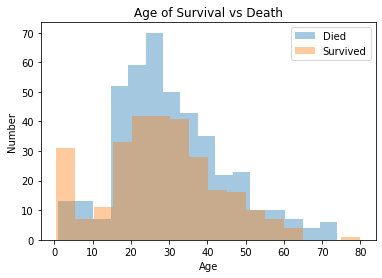

In [329]:
#age_bins = list(range(0,100,10))
df = train[train['Survived'] == 0]
sns.distplot(df['Age'].dropna(),  kde=False, label='Died')
df = train[train['Survived'] == 1]
sns.distplot(df['Age'].dropna(),  kde=False, label='Survived')
plt.legend()
plt.title('Age of Survival vs Death')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

In [330]:
# look into age affects survival
train['AgeDecade'] = (train['Age'] / 10).apply(np.floor)
trained_grouped_by_age_decade = train.groupby('AgeDecade')
print(trained_grouped_by_age_decade['Survived'].agg(np.mean))
print(trained_grouped_by_age_decade['Survived'].count())

AgeDecade
0.0    0.612903
1.0    0.401961
2.0    0.350000
3.0    0.437126
4.0    0.382022
5.0    0.416667
6.0    0.315789
7.0    0.000000
8.0    1.000000
Name: Survived, dtype: float64
AgeDecade
0.0     62
1.0    102
2.0    220
3.0    167
4.0     89
5.0     48
6.0     19
7.0      6
8.0      1
Name: Survived, dtype: int64


In [331]:
print(train.groupby('SibSp')['Survived'].agg(np.mean))
print(train.groupby('SibSp')['Survived'].count())

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64


In [332]:
print(train.groupby('Parch')['Survived'].agg(np.mean))
print(train.groupby('Parch')['Survived'].count())

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64


In [333]:
print(train.groupby('Embarked')['Survived'].agg(np.mean))
print(train.groupby('Embarked')['Survived'].count())
# suprisingly this looks like a good feature

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64


Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Survived, Length: 147, dtype: int64


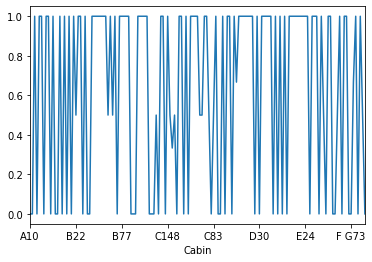

In [334]:
survival_by_cabin = train.groupby('Cabin')['Survived']
print(survival_by_cabin.agg(np.mean))
print(survival_by_cabin.count())
#print(survival_by_cabin.loc[survival_by_cabin.count() > 1])
survival_by_cabin.agg(np.mean).plot()
plt.show()


In [335]:
def most_frequent(input_list):
    if not input_list:
        return ''
    else:
        occurence_count = Counter(input_list)
        return occurence_count.most_common(1)[0][0] 

In [336]:
print(most_frequent(['A', 'B', 'A']))
print(most_frequent(['']))

A



In [340]:
# break up the cabin column into level and number. Need to check for correlation between different features. Ex.
# pclass and cabin letter are likely correlated
#train['CabinLetter'] = train['Cabin'].str.extract(r"^[a-zA-Z]+").lower()
#s = pd.Series(['C1', 'A1 A2 A3', 'D3'])
#s.str.findall(r'[A-Za-z]', flags=re.IGNORECASE)
train['Cabin'] = train['Cabin'].replace(np.nan, '', regex=True).str.lower()
train['CabinLetter'] = train['Cabin'].str.findall(r'[A-Za-z]', flags=re.IGNORECASE).apply(lambda x: most_frequent(x))
print(train['CabinLetter'].value_counts())

     687
c     59
b     47
d     33
e     32
a     15
f     13
g      4
t      1
Name: CabinLetter, dtype: int64
